In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

In [1]:
def bilateral_filter(img, window_size, sigma_dist, sigma_int):
    '''Aplica filtragem bilateral em uma imagem. window_size ajusta o tamanho
       do filtro. sigma_dist e sigma_int ajustam, respectivamente, o peso da
       distância e da intensidade dos pixels na suavização.'''

    radius = window_size//2
    img_pad = np.pad(img, pad_width=radius, mode='edge')

    dist_weights = np.zeros((window_size, window_size))
    for row in range(dist_weights.shape[0]):
        for col in range(dist_weights.shape[1]):
            dist_weights[row, col] = np.exp(-((row-radius)**2+(col-
                                     radius)**2)/(2*sigma_dist**2))
    dist_weights
    img_smoothed = np.zeros_like(img)
    for row in range(radius, radius+img.shape[0]):
        for col in range(radius, radius+img.shape[1]):

            sub_img = img_pad[row-radius:row+radius+1, 
                              col-radius:col+radius+1]
            img_diff = sub_img - img_pad[row,col]
            gauss_int = np.exp(-(img_diff)**2/(2*sigma_int**2))
            weights = dist_weights*gauss_int
            norm_weights = weights/np.sum(weights)

            img_smoothed[row-radius, col-radius] = np.sum(norm_weights
                                                          *sub_img)
            
            
    return img_smoothed

__kernel void dist_weights_maker(
            const unsigned int    x_img,
            const unsigned int    y_img,
            const unsigned int    radius,
            const unsigned int    sigma_dist,
            __global       float* dist_weights)
{
    int i = get_global_id(0);
    int j = get_global_id(1);
    if ((i < x_img) && (j < y_img)){
        dist_weights[i] [j] = exp(0-((i - radius) * (i-radius) + (cos-radius) * (col - radius)) / 2 * (sigma_dist*sigma_dist))
    }
}
    


SyntaxError: invalid syntax (<ipython-input-1-d0b21e0e1bf4>, line 32)

In [3]:
window_size = 7
img = plt.imread('cameraman.tiff').astype(float)
img_smooth = bilateral_filter(img, window_size, sigma_dist=2, 
                              sigma_int=50)

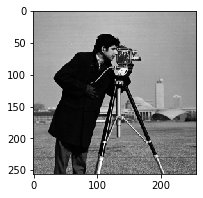

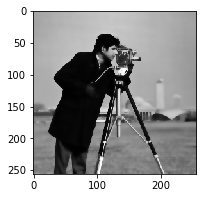

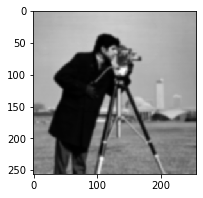

In [4]:
img_smooth_gauss = ndi.gaussian_filter(img, sigma=1.5)

plt.figure(figsize=[3,3])
plt.imshow(img, 'gray')
plt.figure(figsize=[3,3])
plt.imshow(img_smooth, 'gray')
plt.figure(figsize=[3,3])
plt.imshow(img_smooth_gauss, 'gray')

## Identificação de valores apropriados para o decaimento das exponenciais

Vamos identificar valores apropriados para sigma_dist e sigma_int.

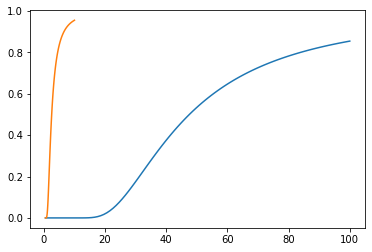

In [5]:
max_sigma_int = 100
max_sigma_dist = 10

avg_diff_window = np.mean(np.abs(img[:-window_size]-img[window_size]))
radius = window_size//2

sigma_int = np.linspace(0.5, max_sigma_int, 100)
sigma_dist = np.linspace(0.5, max_sigma_dist, 100)
gauss_val_int = np.exp(-avg_diff_window**2/(2*sigma_int**2))
gauss_val_dist = np.exp(-radius**2/(2*sigma_dist**2))

plt.figure()
plt.plot(sigma_int, gauss_val_int)
plt.plot(sigma_dist, gauss_val_dist)

## Exemplo ilustrativo de filtragem bilateral

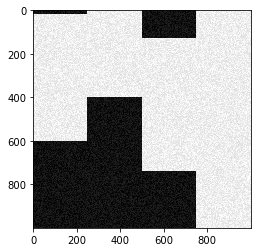

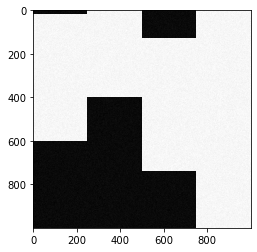

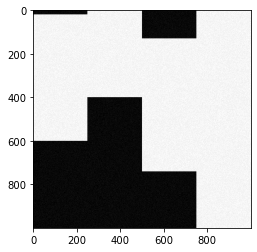

In [6]:
window_size = 7
img = np.zeros((1000,1000))
img[20:600,0:250] = 255
img[0:400,250:500] = 255
img[130:740,500:750] = 255
img[:,750:] = 255
img += 40*np.random.rand(1000, 1000)

img_smooth = bilateral_filter(img, window_size, sigma_dist=2, 
                              sigma_int=50)
img_smooth_gauss = ndi.gaussian_filter(img, sigma=1.5)

plt.figure()
plt.imshow(img, 'gray')
plt.figure()
plt.imshow(img_smooth, 'gray')
plt.figure()
plt.imshow(img_smooth_gauss, 'gray')